In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dataset=pd.read_excel('/content/newcombined.xlsx')

In [22]:

# Load data from 'Sheet1' of the Excel file
df = pd.read_excel('/content/newcombined.xlsx', sheet_name='Sheet1')

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix (Pearson's correlation by default)
corr = numeric_df.corr()

print(corr)  # Shows correlation coefficients between parameters


                   Alkalinity  AmmoniumNitrogen       BOD       COD  \
Alkalinity           1.000000          0.019813  0.136048  0.104247   
AmmoniumNitrogen     0.019813          1.000000 -0.134470 -0.094452   
BOD                  0.136048         -0.134470  1.000000  0.372040   
COD                  0.104247         -0.094452  0.372040  1.000000   
CalciumHardness      0.259427         -0.053950  0.084639  0.042983   
Chloride             0.207943         -0.045707  0.151094  0.099811   
Conductivity         0.144577          0.005892  0.152822  0.115212   
DOxygen              0.048509         -0.043382  0.146637  0.075122   
MagnesiumHardness    0.210750          0.039408  0.121320  0.096275   
NitrateNitrogen      0.094616          0.052781 -0.024192  0.120860   
NitriteNitrogen      0.028258         -0.036632 -0.031199 -0.006640   
Phosphate(PO4)      -0.015746         -0.019045 -0.021108 -0.006035   
Potassium            0.042167         -0.049814  0.195378  0.115840   
SSolid

In [23]:

# Load your Excel sheet


# Define standard permissible and ideal values for parameters (customize as per relevant guidelines)
standards = {
    'pH': {'ideal': 7.0, 'standard': 8.5, 'weight': 0.11},
    'DOxygen': {'ideal': 14.6, 'standard': 6.0, 'weight': 0.17},
    'BOD': {'ideal': 0, 'standard': 5.0, 'weight': 0.11},
    'NitrateNitrogen': {'ideal': 0, 'standard': 50.0, 'weight': 0.10},
    'Turbidity': {'ideal': 0, 'standard': 5.0, 'weight': 0.10},
    'Chloride': {'ideal': 0, 'standard': 250.0, 'weight': 0.09},
    'Phosphate(PO4)': {'ideal': 0, 'standard': 0.1, 'weight': 0.07},
    'Conductivity': {'ideal': 0, 'standard': 1500.0, 'weight': 0.06},
    'Sulphate(SO4)': {'ideal': 0, 'standard': 250.0, 'weight': 0.07},
    'Temperature': {'ideal': 25, 'standard': 30, 'weight': 0.04},
    'AmmoniumNitrogen': {'ideal': 0, 'standard': 0.5, 'weight': 0.07},
    'MagnesiumHardness': {'ideal': 0, 'standard': 50.0, 'weight': 0.06},
    'Potassium': {'ideal': 0, 'standard': 10.0, 'weight': 0.04},
    'CalciumHardness': {'ideal': 0, 'standard': 75.0, 'weight': 0.05},
    'TDS': {'ideal': 0, 'standard': 1000.0, 'weight': 0.10},
    'COD': {'ideal': 0, 'standard': 10.0, 'weight': 0.09},
    'Sodium': {'ideal': 0, 'standard': 200.0, 'weight': 0.08},
    'NitriteNitrogen': {'ideal': 0, 'standard': 3.0, 'weight': 0.08},
    'Alkalinity': {'ideal': 0, 'standard': 200.0, 'weight': 0.06},
}


def quality_rating(value, ideal, standard):
    if value <= ideal:
        return 100
    elif value > standard:
        return 0
    else:
        return round(((standard - value) / (standard - ideal)) * 100, 2)

def calculate_wqi(row):
    weighted_sum = 0
    total_weight = 0
    for param, vals in standards.items():
        if param in row and not pd.isna(row[param]):
            qr = quality_rating(row[param], vals['ideal'], vals['standard'])
            weighted_sum += qr * vals['weight']
            total_weight += vals['weight']
    if total_weight > 0:
        return weighted_sum / total_weight
    else:
        return np.nan

def classify_wqi(wqi):
    if pd.isna(wqi):
        return None  # returns None when input is not numerical or invalid WQI

    if 90 <= wqi <= 100:
        return 'Excellent'  # WQI 90–100

    elif 70 <= wqi < 90:
        return 'Very Good / Good'  # WQI 70–89

    elif 50 <= wqi < 70:
        return 'Fair'  # WQI 50–69

    elif 25 <= wqi < 50:
        return 'Poor'  # WQI 25–49

    elif wqi < 25:
        return 'Very Poor / Unsuitable'  # WQI below 25
    else:
        return None  # Handle cases where WQI is out of expected range


# Calculate WQI for each row (sampled water point)
df['WQI'] = df.apply(calculate_wqi, axis=1)
df['Water_Quality_Class'] = df['WQI'].apply(classify_wqi)

print(df[['WQI', 'Water_Quality_Class']])


           WQI Water_Quality_Class
0    57.086258                Fair
1    61.109871                Fair
2    62.401161                Fair
3    53.166194                Fair
4    56.054516                Fair
..         ...                 ...
577  59.088774                Fair
578  62.600516                Fair
579  66.355161                Fair
580  71.285935    Very Good / Good
581  66.826903                Fair

[582 rows x 2 columns]


In [24]:
# # Load dataset
# file_path = '/content/Final_Copy_Of_Yatch_Club.xlsx'
# df = pd.read_excel(file_path, sheet_name='Sheet1')

# # Your WHO standards for parameters used in WQI calculation
# standards = {
#     'pH': {'ideal': 7.0, 'standard': 8.5, 'weight': 0.11},
#     'D___Oxygen': {'ideal': 14.6, 'standard': 6.0, 'weight': 0.17},
#     'BOD': {'ideal': 0, 'standard': 5.0, 'weight': 0.11},
#     'Nitrate_Nitrogen': {'ideal': 0, 'standard': 50.0, 'weight': 0.10},
#     'Turbidity': {'ideal': 0, 'standard': 5.0, 'weight': 0.10},
# }

# # List of all relevant parameters (columns) to consider for suggestions:
# param_columns = [
#     'Alkalinity', 'AmmoniumNitrogen', 'BOD', 'COD'Calcium_Hardness', 'Chloride',
#     'Conductivity', 'D___Oxygen', 'Magnesium_Hardness', 'Nitrate_Nitrogen',
#     'Nitrite_Nitrogen', 'Phosphate_(PO4)', 'Potassium', 'S__Solids', 'Sodium',
#     'Sulphate_(SO4)', 'TDS', 'Temperature', 'Turbidity', 'pH'
# ]

# # Function to calculate quality rating for each parameter used in WQI
# def quality_rating(value, ideal, standard):
#     if value <= ideal:
#         return 100
#     elif value > standard:
#         return 0
#     else:
#         return ((standard - value) / (standard - ideal)) * 100

# # Calculate WQI for each row based on weighted quality ratings
# def calculate_wqi(row):
#     weighted_sum = 0
#     total_weight = 0
#     for param, vals in standards.items():
#         if param in row and pd.notna(row[param]):
#             qr = quality_rating(row[param], vals['ideal'], vals['standard'])
#             weighted_sum += qr * vals['weight']
#             total_weight += vals['weight']
#     if total_weight > 0:
#         return weighted_sum / total_weight
#     else:
#         return np.nan

# # Add WQI column to dataframe
# df['WQI'] = df.apply(calculate_wqi, axis=1)


# # Classify water quality class based on WQI value
# def classify_wqi_simple(wqi):
#     if wqi is None:
#         return None
#     elif wqi >= 90:
#         return 'Excellent'
#     elif wqi >= 70:
#         return 'Very Good'
#     elif wqi >= 50:
#         return 'Good'
#     elif wqi >= 25:
#         return 'Poor'
#     else:
#         return 'Very Poor / Unsuitable'

# # Suggest parameter ranges based on nearby WQI values within delta
# def suggest_param_ranges(wqi_input, df, delta=2):
#     matched_rows = df[(df['WQI'] >= wqi_input - delta) & (df['WQI'] <= wqi_input + delta)]
#     if matched_rows.empty:
#         return None
#     param_ranges = {}
#     for param in param_columns:
#         if param in matched_rows:
#             param_ranges[param] = {
#                 'min': matched_rows[param].min(),
#                 'max': matched_rows[param].max(),
#                 'mean': matched_rows[param].mean()
#             }
#     return param_ranges

# # Main prediction function: input WQI, output class plus parameter ranges
# def predict_from_wqi(wqi_input, df):
#     water_quality_class = classify_wqi_simple(wqi_input)
#     param_suggestions = suggest_param_ranges(wqi_input, df)
#     return {
#         'Input_WQI': wqi_input,
#         'Water_Quality_Class': water_quality_class,
#         'Suggested_Parameter_Ranges': param_suggestions
#     }

# # Example usage:
# user_wqi = 72  # For example, user inputs WQI = 72
# result = predict_from_wqi(user_wqi, df)

# print(f"Input WQI: {result['Input_WQI']}")
# print(f"Predicted Water Quality Class: {result['Water_Quality_Class']}")
# print("Suggested parameter ranges for this WQI:")
# if result['Suggested_Parameter_Ranges'] is not None:
#     for param, stats in result['Suggested_Parameter_Ranges'].items():
#         print(f"  {param}: min={stats['min']:.2f}, max={stats['max']:.2f}, mean={stats['mean']:.2f}")
# else:
#     print("  No data available for this WQI range.")

THe code is predicting the water quality index for the water bodies and providing various parameters to the user so that they can use the water body based on the predicted parameters....

Enter the WQI for the water body that you want to test: 56
Input WQI: 56.0
Predicted Water Quality Class: Fair
Suggested parameter ranges for given WQI:
Alkalinity: min=72.000, max=400.000, mean=132.625
AmmoniumNitrogen: min=0.008, max=1.217, mean=0.478
BOD: min=0.800, max=7.900, mean=2.484
COD: min=9.220, max=90.200, mean=22.735
CalciumHardness: min=42.000, max=176.000, mean=89.855
Chloride: min=5.990, max=53.030, mean=24.318
Conductivity: min=169.600, max=905.600, mean=290.882
DOxygen: min=2.400, max=11.800, mean=7.676
MagnesiumHardness: min=22.000, max=90.000, mean=45.794
NitrateNitrogen: min=0.003, max=7.900, mean=2.356
NitriteNitrogen: min=0.020, max=2.600, mean=0.684
Phosphate(PO4): min=0.020, max=7.960, mean=1.608
Potassium: min=0.020, max=23.480, mean=2.868
SSolids: min=5.000, max=190.000, mean=27.827
Sodium: min=0.780, max=36.400, mean=13.429
Sulphate(SO4): min=1.750, max=40.000, mean=11.555
TDS: min=112.000, max=350.000, mean=181.067
Temperature: min=16.000, max=33.000, mean=

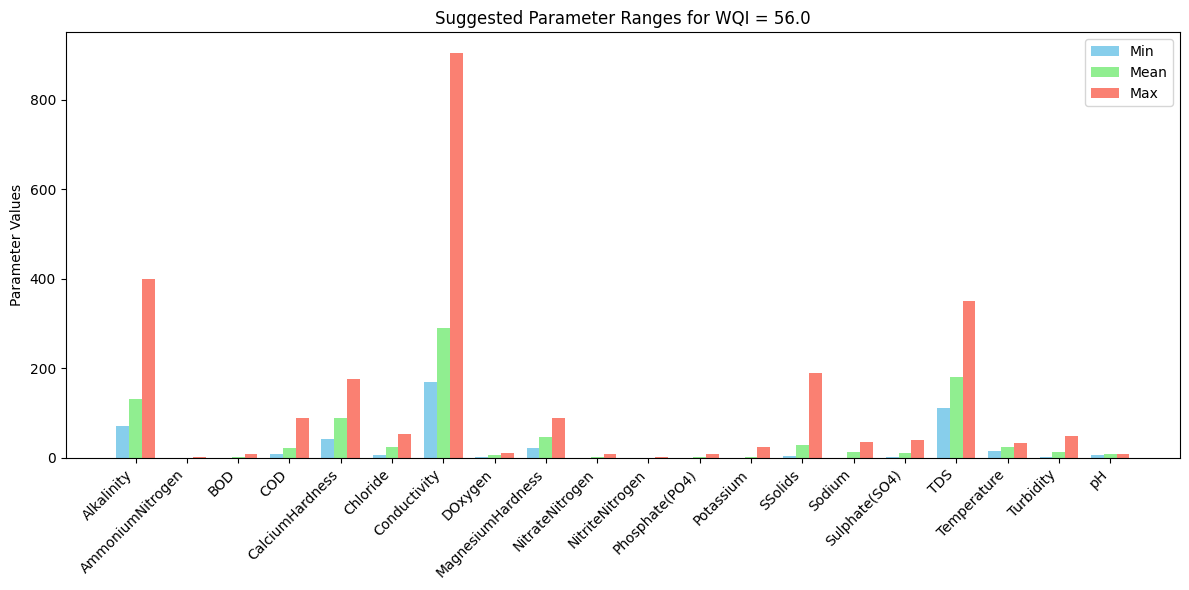

In [25]:

# Load dataset


#  WHO standards for parameters used in WQI calculation
standards = {
    'pH': {'ideal': 7.0, 'standard': 8.5, 'weight': 0.11},
    'DOxygen': {'ideal': 14.6, 'standard': 6.0, 'weight': 0.17},
    'BOD': {'ideal': 0, 'standard': 5.0, 'weight': 0.11},
    'NitrateNitrogen': {'ideal': 0, 'standard': 50.0, 'weight': 0.10},
    'Turbidity': {'ideal': 0, 'standard': 5.0, 'weight': 0.10},
    'Chloride': {'ideal': 0, 'standard': 250.0, 'weight': 0.09},
    'Phosphate(PO4)': {'ideal': 0, 'standard': 0.1, 'weight': 0.07},
    'Conductivity': {'ideal': 0, 'standard': 1500.0, 'weight': 0.06},
    'Sulphate(SO4)': {'ideal': 0, 'standard': 250.0, 'weight': 0.07},
    'Temperature': {'ideal': 25, 'standard': 30, 'weight': 0.04},
    'AmmoniumNitrogen': {'ideal': 0, 'standard': 0.5, 'weight': 0.07},
    'MagnesiumHardness': {'ideal': 0, 'standard': 50.0, 'weight': 0.06},
    'Potassium': {'ideal': 0, 'standard': 10.0, 'weight': 0.04},
    'CalciumHardness': {'ideal': 0, 'standard': 75.0, 'weight': 0.05},
    'TDS': {'ideal': 0, 'standard': 1000.0, 'weight': 0.10},
    'COD': {'ideal': 0, 'standard': 10.0, 'weight': 0.09},
    'Sodium': {'ideal': 0, 'standard': 200.0, 'weight': 0.08},
    'NitriteNitrogen': {'ideal': 0, 'standard': 3.0, 'weight': 0.08},
    'Alkalinity': {'ideal': 0, 'standard': 200.0, 'weight': 0.06},
}

# List of all parameters in dataset
param_columns = [
    'Alkalinity', 'AmmoniumNitrogen', 'BOD', 'COD', 'CalciumHardness', 'Chloride',
    'Conductivity', 'DOxygen', 'Magnesium', 'MagnesiumHardness', 'NitrateNitrogen',
    'NitriteNitrogen', 'Phosphate(PO4)', 'Potassium', 'SSolids', 'Sodium',
    'Sulphate(SO4)', 'TDS', 'Temperature', 'Turbidity', 'pH'
]

# Function to calculate quality rating for each parameter used in WQI
# Your standards dictionary and param_columns list as before

# Function to calculate quality rating (same as before)
def quality_rating(value, ideal, standard):
    if value <= ideal:
        return 100
    elif value > standard:
        return 0
    else:
        return ((standard - value) / (standard - ideal)) * 100

# Function to calculate WQI (same as before)
def calculate_wqi(row):
    weighted_sum = 0
    total_weight = 0
    for param, vals in standards.items():
        if param in row and pd.notna(row[param]):
            qr = quality_rating(row[param], vals['ideal'], vals['standard'])
            weighted_sum += qr * vals['weight']
            total_weight += vals['weight']
    if total_weight > 0:
        return weighted_sum / total_weight
    else:
        return np.nan

# Add WQI to dataframe
df['WQI'] = df.apply(calculate_wqi, axis=1)

# Classify WQI (same as before)
def classify_wqi_simple(wqi):
    if pd.isna(wqi):
        return None

    if 90 <= wqi <= 100:
        return 'Excellent'
    elif 70 <= wqi < 90:
        return 'Very Good / Good'
    elif 50 <= wqi < 70:
        return 'Fair'
    elif 25 <= wqi < 50:
        return 'Poor'
    elif wqi < 25:
        return 'Very Poor / Unsuitable'
    else:
        return None

df['Water_Quality_Class'] = df['WQI'].apply(classify_wqi_simple)

# Suggest parameter ranges
def suggest_param_ranges(wqi_input, df, delta=2):
    matched_rows = df[(df['WQI'] >= wqi_input - delta) & (df['WQI'] <= wqi_input + delta)]
    if matched_rows.empty:
        return None
    param_ranges = {}
    for param in param_columns:
        if param in matched_rows:
            param_values = matched_rows[param].dropna()
            if not param_values.empty:
                param_ranges[param] = {
                    'min': param_values.min(),
                    'max': param_values.max(),
                    'mean': param_values.mean()
                }
    return param_ranges

# Function to plot parameter ranges graphically
def plot_param_ranges(param_ranges, input_wqi):
    if not param_ranges:
        print("No data available to plot.")
        return

    params = list(param_ranges.keys())
    mins = [param_ranges[p]['min'] for p in params]
    means = [param_ranges[p]['mean'] for p in params]
    maxs = [param_ranges[p]['max'] for p in params]

    x = range(len(params))
    width = 0.25

    plt.figure(figsize=(12, 6))
    plt.bar([pos - width for pos in x], mins, width=width, label='Min', color='skyblue')
    plt.bar(x, means, width=width, label='Mean', color='lightgreen')
    plt.bar([pos + width for pos in x], maxs, width=width, label='Max', color='salmon')

    plt.xticks(ticks=x, labels=params, rotation=45, ha='right')
    plt.ylabel("Parameter Values")
    plt.title(f"Suggested Parameter Ranges for WQI = {input_wqi}")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Main function to predict water quality and suggest parameters with plot
def predict_parameters_from_wqi(wqi_input, df):
    water_quality_class = classify_wqi_simple(wqi_input)
    param_suggestions = suggest_param_ranges(wqi_input, df)
    return {
        'Input_WQI': wqi_input,
        'Water_Quality_Class': water_quality_class,
        'Suggested_Parameter_Ranges': param_suggestions
    }

# Example: user input for WQI
input_wqi = float(input("Enter the WQI for the water body that you want to test: "))
result = predict_parameters_from_wqi(input_wqi, df)

print(f"Input WQI: {result['Input_WQI']}")
print(f"Predicted Water Quality Class: {result['Water_Quality_Class']}")
print("Suggested parameter ranges for given WQI:")
if result['Suggested_Parameter_Ranges'] is not None:
    for param, stats in result['Suggested_Parameter_Ranges'].items():
        print(f"{param}: min={stats['min']:.3f}, max={stats['max']:.3f}, mean={stats['mean']:.3f}")
    plot_param_ranges(result['Suggested_Parameter_Ranges'], input_wqi)
else:
    print("No data available for this WQI range.")



IN THIS CODE USER WILL ENTER the dates and model will show the parameters difference  in that period


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset


# Ensure the date column is datetime type, update 'Date' to your actual column
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')   # library benefits😎

parameters = [
    'Alkalinity', 'AmmoniumNitrogen', 'BOD', 'COD', 'CalciumHardness', 'Chloride',
    'Conductivity', 'DOxygen', 'Magnesium', 'MagnesiumHardness', 'NitrateNitrogen',
    'NitriteNitrogen', 'Phosphate(PO4)', 'Potassium', 'SSolids', 'Sodium',
    'Sulphate(SO4)', 'TDS', 'Temperature', 'Turbidity', 'pH'
]

def get_row_by_date(date, location):
    loc_norm = location.strip().lower()
    rows = df[(df['Date'] == date) & (df['Location'].str.strip().str.lower() == loc_norm)]
    if rows.empty:
        return None
    return rows.iloc[0]

def main():
    Location = input("Enter the location: ")
    date1_str = input("Enter the first date (mm/01/yyyy): ")
    date2_str = input("Enter the second date (mm/01/yyyy): ")

    try:
        date1 = pd.to_datetime(date1_str, format='%m/%d/%Y')
        date2 = pd.to_datetime(date2_str, format='%m/%d/%Y')
    except ValueError:
        print("Invalid date format. Use mm/dd/yyyy.")
        return

    row1 = get_row_by_date(date1,Location)
    row2 = get_row_by_date(date2,Location)

    if row1 is None:
        print(f"No data found for date: {date1_str}")
        return
    if row2 is None:
        print(f"No data found for date: {date2_str}")
        return

    diffs = {}
    print(f"\nParameter differences (from the 1st entered date to the 2nd entered date):")
    for param in parameters:
        val1 = row1.get(param, None)
        val2 = row2.get(param, None)
        if pd.notna(val1) and pd.notna(val2):          # easy handle karega 😉
            diff = val2 - val1
            diffs[param] = diff
            print(f"{param}: {diff:.3f}")
        else:
            diffs[param] = None
            print(f"{param}: Missing data")        #information nahi mili tab ke liye

    # Plotting the differences using a bar chart
    params = list(diffs.keys())
    values = [diffs[p] if diffs[p] is not None else 0 for p in diffs.keys()] # Fix: Use p in diffs.keys() to get the keys

    plt.figure(figsize=(12, 6))
    bars = plt.bar(params, values, color=['green' if v >= 0 else 'red' for v in values])
    plt.xticks(rotation=75)
    plt.ylabel('Difference in Value')
    plt.title(f'Parameter Differences between {date2_str} and {date1_str}')
    plt.axhline(0, color='black', linewidth=0.8)

    # Annotate bars with difference values
    for bar, val in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + (0.02 * max(values)), f'{val:.2f}',
                 ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    # Basic observation based on differences
    print("\nBasic observations based on differences:")
    increasing = [p for p, v in diffs.items() if v is not None and v > 0]
    decreasing = [p for p, v in diffs.items() if v is not None and v < 0]
    no_change = [p for p, v in diffs.items() if v == 0]

    print(f"Parameters increased: {', '.join(increasing) if increasing else 'None'}")
    print(f"Parameters decreased: {', '.join(decreasing) if decreasing else 'None'}")
    print(f"Parameters unchanged: {', '.join(no_change) if no_change else 'None'}")

if __name__ == "__main__":
    main()

Enter the location: Bairagarh
Enter the first date (mm/01/yyyy): 04/01/2011
Enter the second date (mm/01/yyyy): 11/01/2022
No data found for date: 04/01/2011


THIS CODE WILL PROVIDE THE DENSITY OF PARAMETER IN VARIOUS REGION OF A PARTICULAR WATERBODY


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# Load dataset
file_path = '/content/newcombined.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Parameters, their ideal and standard values, and weights for WQI
standards = {
    'pH': {'ideal': 7.0, 'standard': 8.5, 'weight': 0.11},
    'DOxygen': {'ideal': 14.6, 'standard': 6.0, 'weight': 0.17},
    'BOD': {'ideal': 0, 'standard': 5.0, 'weight': 0.11},
    'NitrateNitrogen': {'ideal': 0, 'standard': 50.0, 'weight': 0.10},
    'Turbidity': {'ideal': 0, 'standard': 5.0, 'weight': 0.10},
    'Chloride': {'ideal': 0, 'standard': 250.0, 'weight': 0.09},
    'Phosphate(PO4)': {'ideal': 0, 'standard': 0.1, 'weight': 0.07},
    'Conductivity': {'ideal': 0, 'standard': 1500.0, 'weight': 0.06},
    'Sulphate(SO4)': {'ideal': 0, 'standard': 250.0, 'weight': 0.07},
    'Temperature': {'ideal': 25, 'standard': 30, 'weight': 0.04},
    'AmmoniumNitrogen': {'ideal': 0, 'standard': 0.5, 'weight': 0.07},
    'MagnesiumHardness': {'ideal': 0, 'standard': 50.0, 'weight': 0.06},
    'Potassium': {'ideal': 0, 'standard': 10.0, 'weight': 0.04},
    'CalciumHardness': {'ideal': 0, 'standard': 75.0, 'weight': 0.05},
    'TDS': {'ideal': 0, 'standard': 1000.0, 'weight': 0.10},
    'COD': {'ideal': 0, 'standard': 10.0, 'weight': 0.09},
    'Sodium': {'ideal': 0, 'standard': 200.0, 'weight': 0.08},
    'NitriteNitrogen': {'ideal': 0, 'standard': 3.0, 'weight': 0.08},
    'Alkalinity': {'ideal': 0, 'standard': 200.0, 'weight': 0.06},
}
# Function to calculate quality rating per parameter
def quality_rating(value, ideal, standard):
    if pd.isna(value):
        return np.nan
    if value <= ideal:
        return 100
    elif value >= standard:
        return 0
    else:
        return ((standard - value) / (standard - ideal)) * 100

# Calculate WQI score for each row
def calculate_wqi(row):
    numerator = 0
    denominator = 0
    for param, vals in standards.items():
        q = quality_rating(row[param], vals['ideal'], vals['standard'])
        if not pd.isna(q):
            numerator += q * vals['weight']
            denominator += vals['weight']
    return numerator / denominator if denominator != 0 else np.nan

df['WQI'] = df.apply(calculate_wqi, axis=1)

# Classify WQI into water quality classes
def classify_wqi(wqi):
    if pd.isna(wqi):
        return np.nan
    elif wqi >= 90:
        return 4  # Excellent
    elif wqi >= 70:
        return 3  # Very Good
    elif wqi >= 50:
        return 2  # Good
    elif wqi >= 25:
        return 1  # Poor
    else:
        return 0  # Very Poor

df['WQI_class'] = df['WQI'].apply(classify_wqi)

# Features and target for ML models
feature_cols = [
    'Alkalinity', 'AmmoniumNitrogen', 'BOD', 'COD', 'CalciumHardness', 'Chloride',
    'Conductivity', 'DOxygen', 'MagnesiumHardness', 'NitrateNitrogen',
    'NitriteNitrogen', 'Phosphate(PO4)', 'Potassium',
    'Sulphate(SO4)', 'TDS', 'Temperature', 'Turbidity', 'pH'
]

# Convert feature columns to numeric, coercing errors to NaN
for col in feature_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with the mean of each column
for col in feature_cols:
    df[col].fillna(df[col].mean(), inplace=True)


# Filter rows without missing values in features or target
model_df = df.dropna(subset=feature_cols + ['WQI_class'])

X = model_df[feature_cols]
y = model_df['WQI_class'].astype(int)

minority_class = y.value_counts().idxmin()
print(f"Minority class label: {minority_class}")


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize models
clf_dt = DecisionTreeClassifier(random_state=42)
clf_rf = RandomForestClassifier(random_state=42)
clf_svm = SVC(kernel='rbf', random_state=42)

# Train the models
clf_dt.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)

# Predictions
pred_dt = clf_dt.predict(X_test)
pred_rf = clf_rf.predict(X_test)
pred_svm = clf_svm.predict(X_test)

# Evaluation
report_dt = classification_report(y_test, pred_dt, zero_division=1)
report_rf = classification_report(y_test, pred_rf, zero_division=1)
report_svm = classification_report(y_test, pred_svm, zero_division=1)

accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_rf = accuracy_score(y_test, pred_rf)
accuracy_svm = accuracy_score(y_test, pred_svm)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}\n{report_dt}\n")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}\n{report_rf}\n")
print(f"SVM Accuracy: {accuracy_svm:.2f}\n{report_svm}\n")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Create sample data for a runnable example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fix: Scale the data to prevent convergence warnings and improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of epochs to plot
max_epochs = 100
epochs = np.arange(1, max_epochs + 1)
acc_svm = []

# Loop to train and evaluate the model for each epoch
for epoch in epochs:
    # Set max_iter for each epoch
    # The max_iter is now meaningful because the data is scaled
    clf_svm = SVC(max_iter=epoch, random_state=42)
    # Fit the model on the SCALED training data
    clf_svm.fit(X_train_scaled, y_train)
    # Predict on the SCALED test data
    pred_svm = clf_svm.predict(X_test_scaled)
    # Calculate and store the accuracy
    acc_svm.append(accuracy_score(y_test, pred_svm))

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc_svm, marker='o', linestyle='-', label='SVC Model')
plt.title('Model Accuracy vs. Number of Iterations (Epochs)')
plt.xlabel('Number of Iterations (Epochs)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Enter the WQI for the water body that you want to test: 90.99
Input WQI: 90.99
Predicted Water Quality Class: Excellent
Suggested parameter ranges for given WQI:
No data available for this WQI range.
How many sampling locations do you want to plot? 2
Enter the latitude for location 1: 23.256
Enter the longitude for location 1: 77.399
Enter value for parameter 'Alkalinity' at location 1 (or leave blank): 212
Enter value for parameter 'AmmoniumNitrogen' at location 1 (or leave blank): 314
Enter value for parameter 'BOD' at location 1 (or leave blank): 2.145
Enter value for parameter 'COD' at location 1 (or leave blank): 2.258
Enter value for parameter 'CalciumHardness' at location 1 (or leave blank): 5.6474
Enter value for parameter 'Chloride' at location 1 (or leave blank): 26.33
Enter value for parameter 'Conductivity' at location 1 (or leave blank): 84.67
Enter value for parameter 'DOxygen' at location 1 (or leave blank): 58.566
Enter value for parameter 'Magnesium' at location 1 (or 

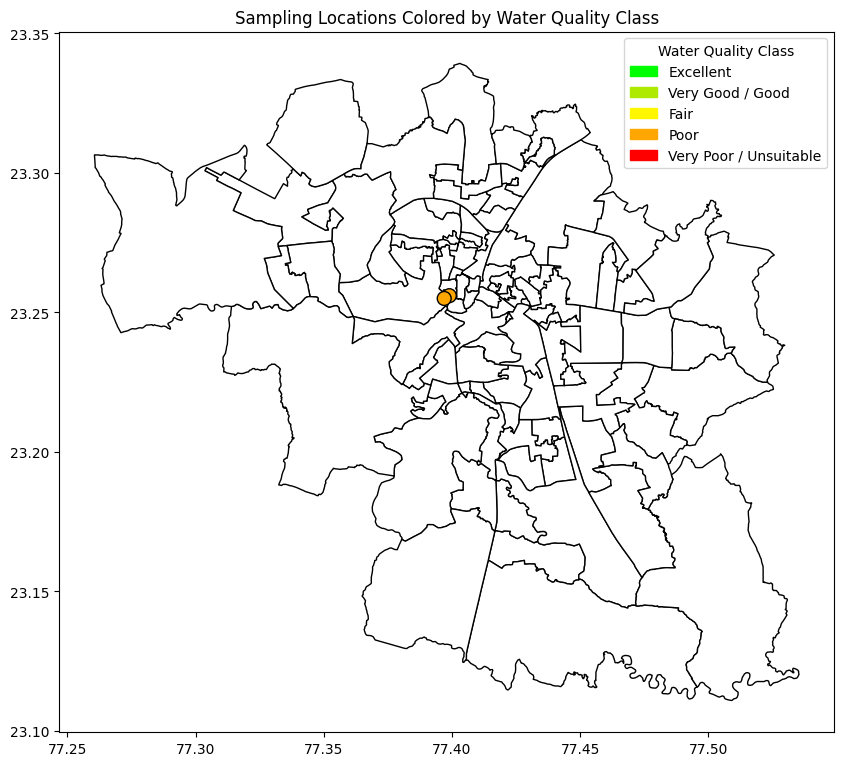

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

standards = {
    'pH': {'ideal': 7.0, 'standard': 8.5, 'weight': 0.11},
    'DOxygen': {'ideal': 14.6, 'standard': 6.0, 'weight': 0.17},
    'BOD': {'ideal': 0, 'standard': 5.0, 'weight': 0.11},
    'NitrateNitrogen': {'ideal': 0, 'standard': 50.0, 'weight': 0.10},
    'Turbidity': {'ideal': 0, 'standard': 5.0, 'weight': 0.10},
    'Chloride': {'ideal': 0, 'standard': 250.0, 'weight': 0.09},
    'Phosphate(PO4)': {'ideal': 0, 'standard': 0.1, 'weight': 0.07},
    'Conductivity': {'ideal': 0, 'standard': 1500.0, 'weight': 0.06},
    'Sulphate(SO4)': {'ideal': 0, 'standard': 250.0, 'weight': 0.07},
    'Temperature': {'ideal': 25, 'standard': 30, 'weight': 0.04},
    'AmmoniumNitrogen': {'ideal': 0, 'standard': 0.5, 'weight': 0.07},
    'MagnesiumHardness': {'ideal': 0, 'standard': 50.0, 'weight': 0.06},
    'Potassium': {'ideal': 0, 'standard': 10.0, 'weight': 0.04},
    'CalciumHardness': {'ideal': 0, 'standard': 75.0, 'weight': 0.05},
    'TDS': {'ideal': 0, 'standard': 1000.0, 'weight': 0.10},
    'COD': {'ideal': 0, 'standard': 10.0, 'weight': 0.09},
    'Sodium': {'ideal': 0, 'standard': 200.0, 'weight': 0.08},
    'NitriteNitrogen': {'ideal': 0, 'standard': 3.0, 'weight': 0.08},
    'Alkalinity': {'ideal': 0, 'standard': 200.0, 'weight': 0.06},
}

# List of all parameters in dataset
param_columns = [
    'Alkalinity', 'AmmoniumNitrogen', 'BOD', 'COD', 'CalciumHardness', 'Chloride',
    'Conductivity', 'DOxygen', 'Magnesium', 'MagnesiumHardness', 'NitrateNitrogen',
    'NitriteNitrogen', 'Phosphate(PO4)', 'Potassium', 'SSolids', 'Sodium',
    'Sulphate(SO4)', 'TDS', 'Temperature', 'Turbidity', 'pH'
]

# Function to calculate quality rating for each parameter used in WQI
def quality_rating(value, ideal, standard):
    if value <= ideal:
        return 100
    elif value > standard:
        return 0
    else:
        return ((standard - value) / (standard - ideal)) * 100

# Calculate WQI for each row based on weighted quality ratings
def calculate_wqi(row):
    weighted_sum = 0
    total_weight = 0
    for param, vals in standards.items():
        if param in row and pd.notna(row[param]):
            qr = quality_rating(row[param], vals['ideal'], vals['standard'])
            weighted_sum += qr * vals['weight']
            total_weight += vals['weight']
    if total_weight > 0:
        return weighted_sum / total_weight
    else:
        return np.nan

# Add WQI column to dataframe
df['WQI'] = df.apply(calculate_wqi, axis=1)

# Function to classify water quality class from WQI
def classify_wqi_simple(wqi):
    if pd.isna(wqi):
        return None  # returns None when input is not numerical or invalid WQI

    if 90 <= wqi <= 100:
        return 'Excellent'  # WQI 90–100

    elif 70 <= wqi < 90:
        return 'Very Good / Good'  # WQI 70–89

    elif 50 <= wqi < 70:
        return 'Fair'  # WQI 50–69

    elif 25 <= wqi < 50:
        return 'Poor'  # WQI 25–49

    elif wqi < 25:
        return 'Very Poor / Unsuitable'  # WQI below 25

    else:
        return None  # Handle cases where WQI is out of expected range


df['Water_Quality_Class'] = df['WQI'].apply(classify_wqi_simple)

# Function to suggest parameter ranges by finding all rows in dataset with WQI within ± delta of user input WQI
def suggest_param_ranges(wqi_input, df, delta=2):
    matched_rows = df[(df['WQI'] >= wqi_input - delta) & (df['WQI'] <= wqi_input + delta)]
    if matched_rows.empty:
        return None
    param_ranges = {}
    for param in param_columns:
        if param in matched_rows:
            param_ranges[param] = {
                'min': matched_rows[param].min(),
                'max': matched_rows[param].max(),
                'mean': matched_rows[param].mean()
            }
    return param_ranges

# Main function for user input WQI to predict quality class and parameter ranges
def predict_parameters_from_wqi(wqi_input, df):
    water_quality_class = classify_wqi_simple(wqi_input)
    param_suggestions = suggest_param_ranges(wqi_input, df)
    return {
        'Input_WQI': wqi_input,
        'Water_Quality_Class': water_quality_class,
        'Suggested_Parameter_Ranges': param_suggestions
    }

# Example usage
input_wqi = float(input("Enter the WQI for the water body that you want to test: "))  # User inputs this WQI
result = predict_parameters_from_wqi(input_wqi, df)

print(f"Input WQI: {result['Input_WQI']}")
print(f"Predicted Water Quality Class: {result['Water_Quality_Class']}")
print("Suggested parameter ranges for given WQI:")
if result['Suggested_Parameter_Ranges'] is not None:
    for param, stats in result['Suggested_Parameter_Ranges'].items():
        print(f"{param}: min={stats['min']:.3f}, max={stats['max']:.3f}, mean={stats['mean']:.3f}")
else:
    print("No data available for this WQI range.")

# Step 1: Collect sampling points with coordinates and parameters
locations = []
num_points = int(input("How many sampling locations do you want to plot? "))

for i in range(num_points):
    latitude = float(input(f"Enter the latitude for location {i+1}: "))
    longitude = float(input(f"Enter the longitude for location {i+1}: "))
    # Collect all parameters for WQI calculation in a dict
    param_values = {}
    for param in param_columns:
        try:
            val = float(input(f"Enter value for parameter '{param}' at location {i+1} (or leave blank): ") or np.nan)
        except ValueError:
            val = np.nan
        param_values[param] = val
    param_values['latitude'] = latitude
    param_values['longitude'] = longitude
    locations.append(param_values)

# Step 2: Create DataFrame from collected data
df_points = pd.DataFrame(locations)

# Step 3: Calculate WQI and Water Quality Class for each point
df_points['WQI'] = df_points.apply(calculate_wqi, axis=1)
df_points['Water_Quality_Class'] = df_points['WQI'].apply(classify_wqi_simple)

# Step 4: Load regions GeoJSON file
region_gdf = gpd.read_file('/content/BHOPAL.geojson')

# Step 5: Create GeoDataFrame for sampling points
gdf_points = gpd.GeoDataFrame(
    df_points,
    geometry=gpd.points_from_xy(df_points['longitude'], df_points['latitude']),
    crs=region_gdf.crs
)

# Step 6: Define colors for water quality classes
color_map = {
    'Excellent': '#00FF00',
    'Very Good / Good': '#AEEA00',
    'Fair': '#FFF600',
    'Poor': '#FFA600',
    'Very Poor / Unsuitable': '#FF0000',
    None: '#BBBBBB'  # For missing class
}

gdf_points['color'] = gdf_points['Water_Quality_Class'].map(color_map)

# Step 7: Plot the map with regions and points colored by WQI class
fig, ax = plt.subplots(figsize=(10,10))
region_gdf.plot(ax=ax, facecolor='white', edgecolor='black')
gdf_points.plot(ax=ax, color=gdf_points['color'], markersize=100, marker='o', edgecolor='k')

# Legend patches for classes
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=clr, label=cls) for cls, clr in color_map.items() if cls is not None]
plt.legend(handles=handles, title='Water Quality Class', bbox_to_anchor=(1, 1))

plt.title("Sampling Locations Colored by Water Quality Class")
plt.show()
